In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import cv2
import time
from opendr.perception.pose_estimation.lightweight_open_pose.lightweight_open_pose_learner import \
    LightweightOpenPoseLearner
from opendr.perception.pose_estimation.lightweight_open_pose.utilities import draw

In [4]:
from utils import VideoReader, FPSCounter


In [5]:
pose_estimator = LightweightOpenPoseLearner(device='cuda')
pose_estimator.download(path=".", verbose=True)
pose_estimator.load("openpose_default")

Metadata json file already exists.
Trained model .pth file already exists.
Pretrained model download complete.


In [7]:
image_provider = VideoReader(0)
fps_counter = FPSCounter()

In [8]:
for counter, img in enumerate(image_provider):
    fps_counter.tic()
    poses = pose_estimator.infer(img)
    fps_counter.toc(img)

    for pose in poses:
        draw(img, pose)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()
    

In [11]:
pose_estimator = LightweightOpenPoseLearner(device='cpu')
pose_estimator.load("openpose_default")
fps_counter = FPSCounter()

In [12]:
for counter, img in enumerate(image_provider):
    fps_counter.tic()
    poses = pose_estimator.infer(img)
    fps_counter.toc(img)

    for pose in poses:
        draw(img, pose)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

In [14]:
pose_estimator = LightweightOpenPoseLearner(device='cpu', num_refinement_stages=1, mobilenet_use_stride=True, half_precision=True)
pose_estimator.load("openpose_default")
pose_estimator.optimize()
fps_counter = FPSCounter()

In [15]:
for counter, img in enumerate(image_provider):
    fps_counter.tic()
    poses = pose_estimator.infer(img)
    fps_counter.toc(img)

    for pose in poses:
        draw(img, pose)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

OpenDR datatypes

In [20]:
image_provider = iter(VideoReader(0))
img = next(image_provider)
image_provider.close()

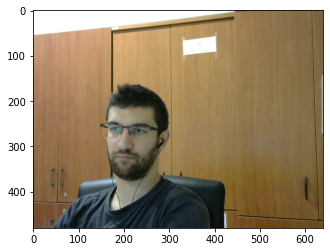

In [21]:
plt.imshow(img[:, :, [2, 1, 0]])

In [22]:
poses = pose_estimator.infer(img)

In [24]:
print(poses[0])

nose: [200, 285]
neck: [223, 420]
r_sho: [125, 420]
r_elb: [73, 472]
r_wri: [-1, -1]
l_sho: [328, 427]
l_elb: [-1, -1]
l_wri: [-1, -1]
r_hip: [-1, -1]
r_knee: [-1, -1]
r_ank: [-1, -1]
l_hip: [-1, -1]
l_knee: [-1, -1]
l_ank: [-1, -1]
r_eye: [178, 255]
l_eye: [238, 262]
r_ear: [155, 270]
l_ear: [290, 285]

